<a href="https://colab.research.google.com/github/Misharosejoseph/Machine-learning-project/blob/main/Calory%20burnt%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data collection and processing


In [5]:
#loading the data from csv file to a panda dataframe calories
calories =pd.read_csv('/content/calories.csv')



In [6]:
#print the first five rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
excercise_data = pd.read_csv('/content/exercise.csv')

In [8]:
excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [9]:
calories_data = pd.concat([excercise_data,calories['Calories']],axis=1)

In [10]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
#checking the no of rows and columns
calories_data.shape

(15000, 9)

In [13]:
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
#checking for missing values
calories_data.isnull().sum()


,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data Analysis

In [15]:
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


DATA VISUALISATION

In [16]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

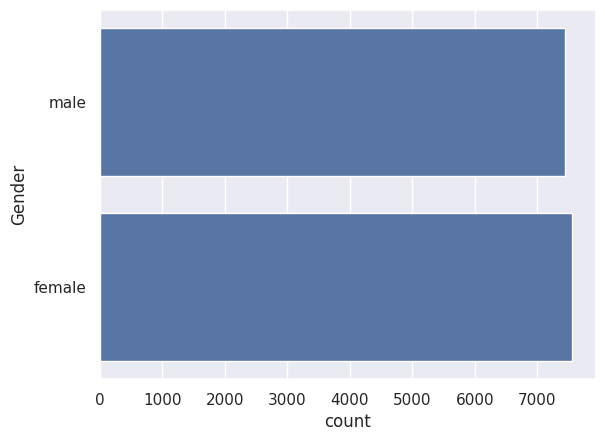

In [17]:
#plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

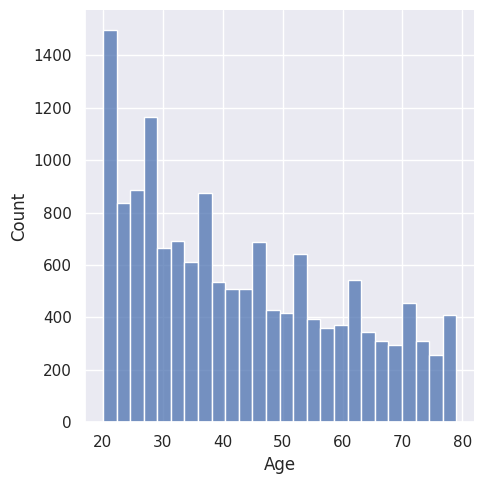

In [18]:
#finding the distribution of age column
sns.displot(calories_data['Age'])








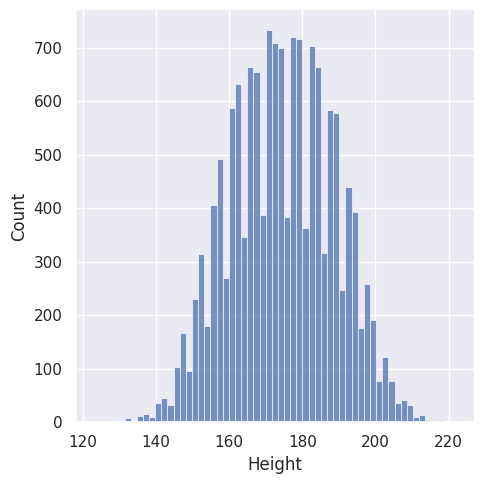

In [19]:
sns.displot(calories_data['Height'])

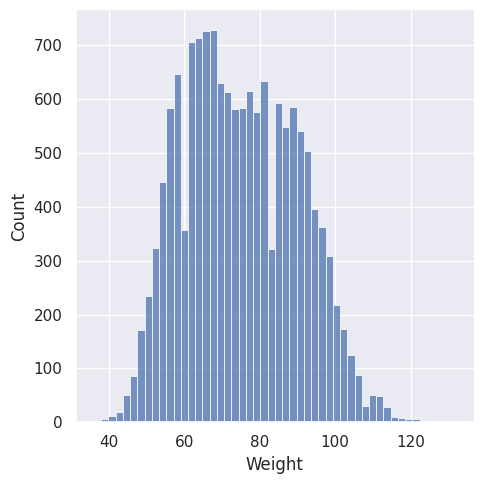

In [21]:
sns.displot(calories_data['Weight'])

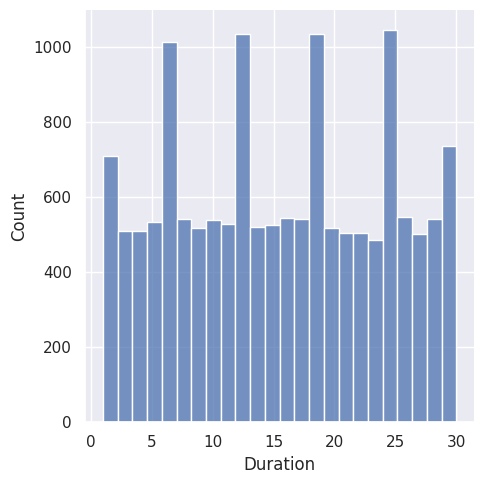

In [22]:
sns.displot(calories_data['Duration'])

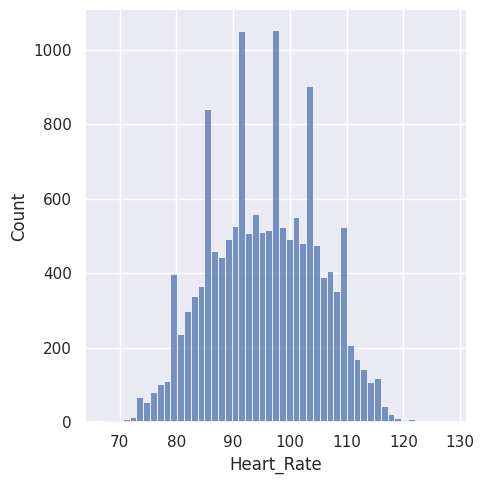

In [23]:
sns.displot(calories_data['Heart_Rate'])

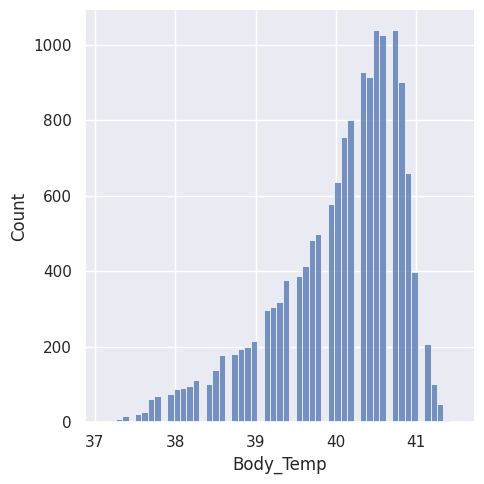

In [24]:
sns.displot(calories_data['Body_Temp'])

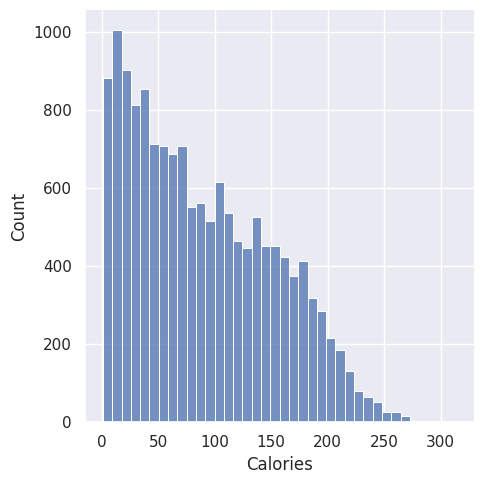

In [25]:
sns.displot(calories_data['Calories'])

Finding the Corelation with dataset

1.positive corelation
2.negative correlation

In [28]:
# Converting the categorical column to numerical values
calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)
correlation = calories_data.corr()

/tmp/ipython-input-772986191.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)


ValueError: Invalid format specifier ',If' for object of type 'float'

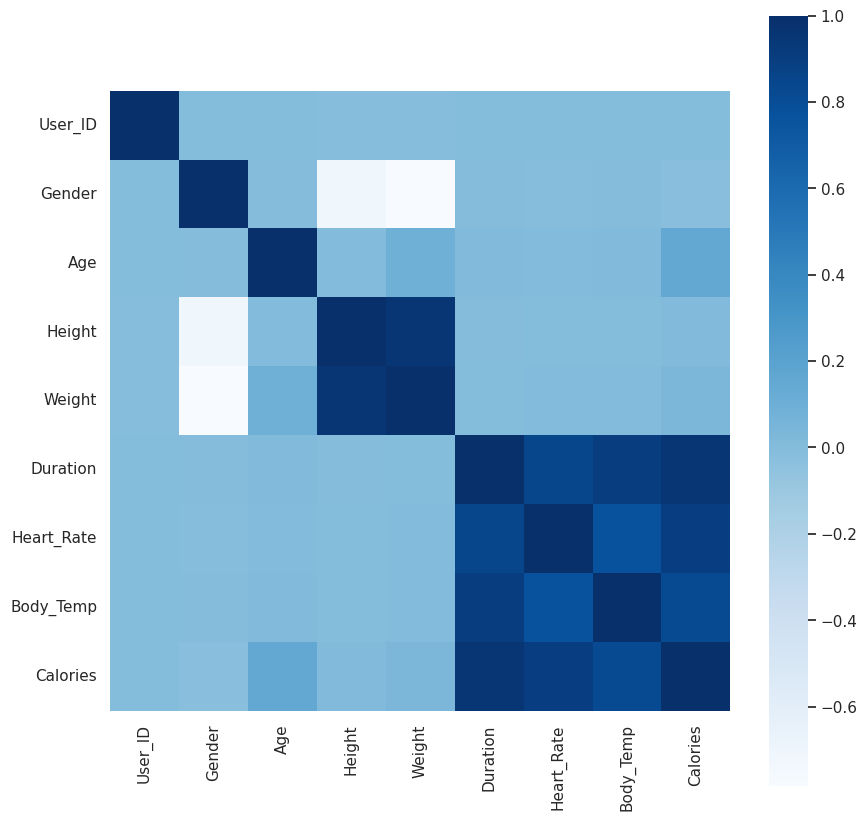

In [30]:
#constucting a heatmap to understand corelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=',If',annot=True,annot_kws={'size':8},cmap='Blues')

In [32]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and target

In [35]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']


In [37]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [38]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
print(X.shape,X_train.shape,X_test_shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBooster Regressor

In [43]:
#loading model
model =XGBRegressor()


In [44]:
#training the model with x-train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

prediction on test data

In [46]:
test_data_prediction=model.predict(x_test)



In [47]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean absolute error

In [49]:
mae = metrics.mean_absolute_error(y_test,test_data_prediction)

In [50]:
print("Mean absolute error=",mae)

Mean absolute error= 1.4833678883314132


In [58]:
gender = input("Enter your Gender (male or female): ")
age = int(input("Enter your Age: "))
height = float(input("Enter your Height: "))
weight = float(input("Enter your Weight: "))
duration = float(input("Enter the Duration of exercise: "))
heart_rate = float(input("Enter your Heart Rate: "))
body_temp = float(input("Enter your Body Temperature: "))

Enter your Gender (male or female): male
Enter your Age: 45
Enter your Height: 78
Enter your Weight: 87
Enter the Duration of exercise: 1
Enter your Heart Rate: 145
Enter your Body Temperature: 89


In [69]:
user_data = pd.DataFrame([[gender, age, height, weight, duration, heart_rate, body_temp]],
                           columns=['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'])

# Ensure Gender is numerical and data types match the training data
user_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)
user_data = user_data.astype({'Age': 'int64', 'Height': 'float64', 'Weight': 'float64',
                              'Duration': 'float64', 'Heart_Rate': 'float64', 'Body_Temp': 'float64'})


display(user_data)

/tmp/ipython-input-19532650.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  user_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,45,78.0,87.0,1.0,145.0,89.0


In [70]:
# Display data types to check preprocessing
print("Data types of user_data before prediction:")
print(user_data.dtypes)

# Make a prediction
predicted_calories = model.predict(user_data)

# Display the prediction
print("The predicted calories burned is:", predicted_calories[0])

Data types of user_data before prediction:
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object
The predicted calories burned is: 40.845837
